In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [4]:
file_path = '/content/univariate_profits_and_populations_from_the_cities.csv'
df = pd.DataFrame(pd.read_csv(file_path))

# df = pd.read_csv('../Datasets/New folder/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M


97

In [5]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
# Separate features and labels
X = df.values[:, 0]  # get input values from first column -- X is a list here
y = df.values[:, 1]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)


X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97
n =  97


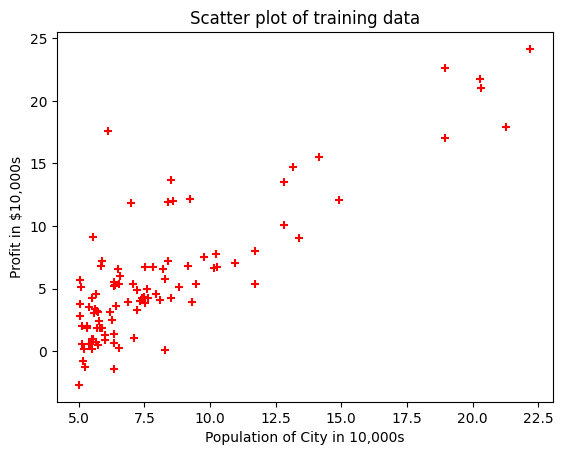

In [7]:
# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
# plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Scatter Plotr')

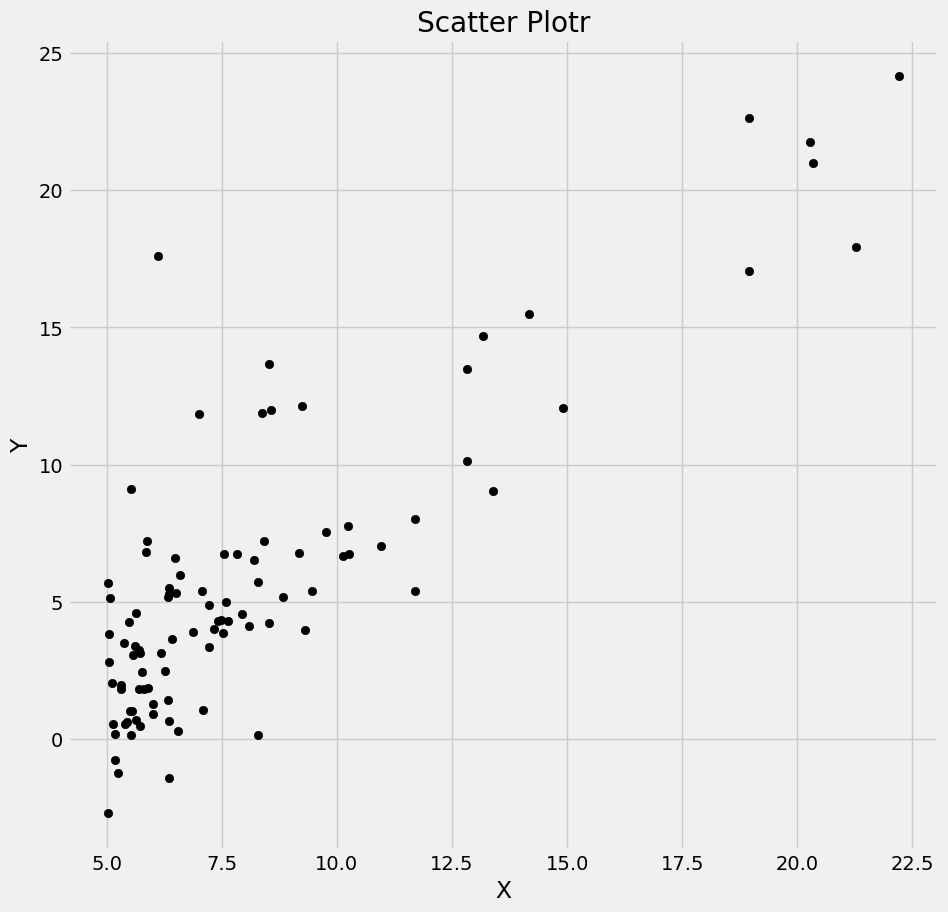

In [8]:
# Another way to plot the data

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_title("Scatter Plotr")

In [9]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.


In [10]:
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

In [11]:
X_0 = np.ones((m, 1)) #We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [12]:
X_1 = X.reshape(m, 1) # You're reshaping features (X) to make it a 2D array suitable for matrix operations.
X_1[:10]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829],
       [7.4764],
       [8.5781],
       [6.4862],
       [5.0546]])

In [13]:

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1)) # We're horizontally stacking X_0 and X_1 to create final feature matrix X.
X[:5]


array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [14]:
theta = np.zeros(2)
theta


array([0., 0.])

In [15]:
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history


In [16]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)


The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [17]:

theta = [0., 0.]
iterations = 150;
alpha = 0.0001;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)


Final value of theta = [0.04588732 0.56470353]
cost_history = [31.64430687 31.22289541 30.80838462 30.40066148 29.99961482 29.60513531
 29.2171154  28.83544929 28.46003292 28.09076395 27.72754171 27.37026715
 27.01884287 26.67317307 26.3331635  25.99872146 25.66975578 25.34617676
 25.02789619 24.7148273  24.40688473 24.10398453 23.80604411 23.51298226
 23.22471907 22.94117596 22.66227563 22.38794203 22.11810039 21.85267713
 21.59159989 21.3347975  21.08219995 20.83373838 20.58934505 20.34895333
 20.1124977  19.87991368 19.65113787 19.42610791 19.20476244 18.98704113
 18.77288463 18.56223455 18.35503346 18.15122489 17.95075327 17.75356396
 17.55960319 17.3688181  17.18115667 16.99656775 16.81500103 16.636407
 16.46073698 16.28794308 16.11797821 15.95079603 15.78635096 15.62459819
 15.46549362 15.30899388 15.15505631 15.00363895 14.85470052 14.70820044
 14.56409876 14.4223562  14.28293414 14.14579456 14.01090009 13.87821396
 13.7477     13.61932264 13.49304689 13.36883832 13.24666309 13.

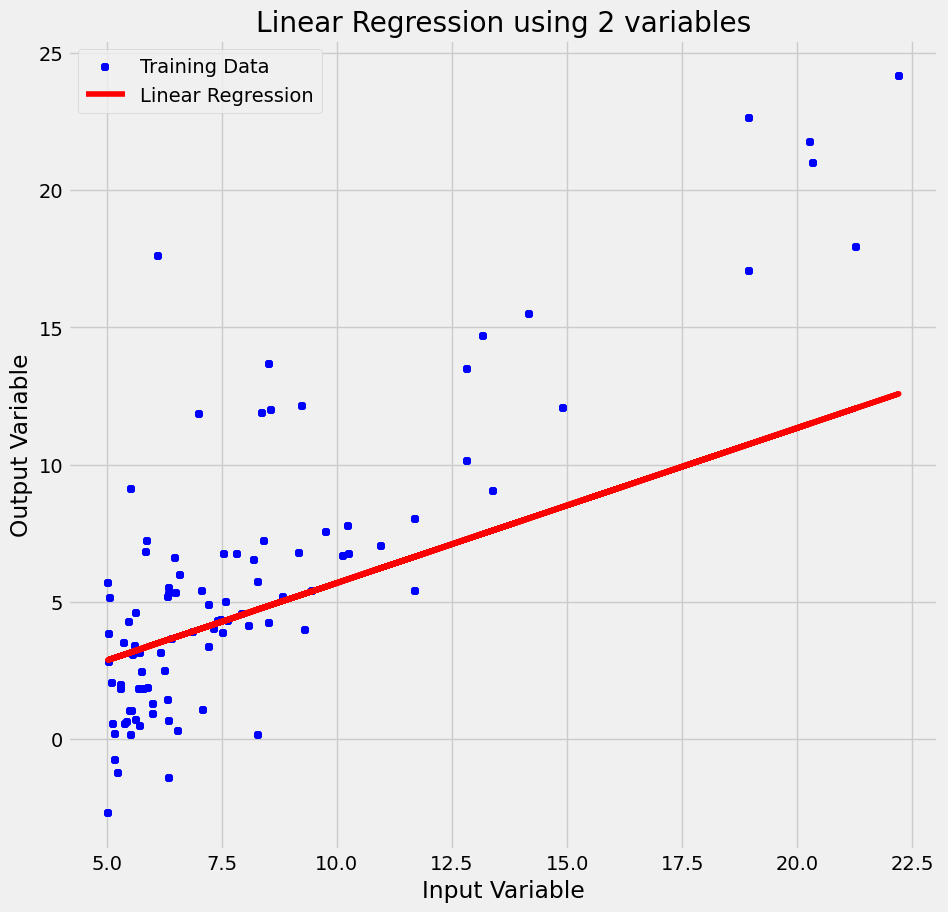

In [18]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='b', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='r', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression using 2 variables')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

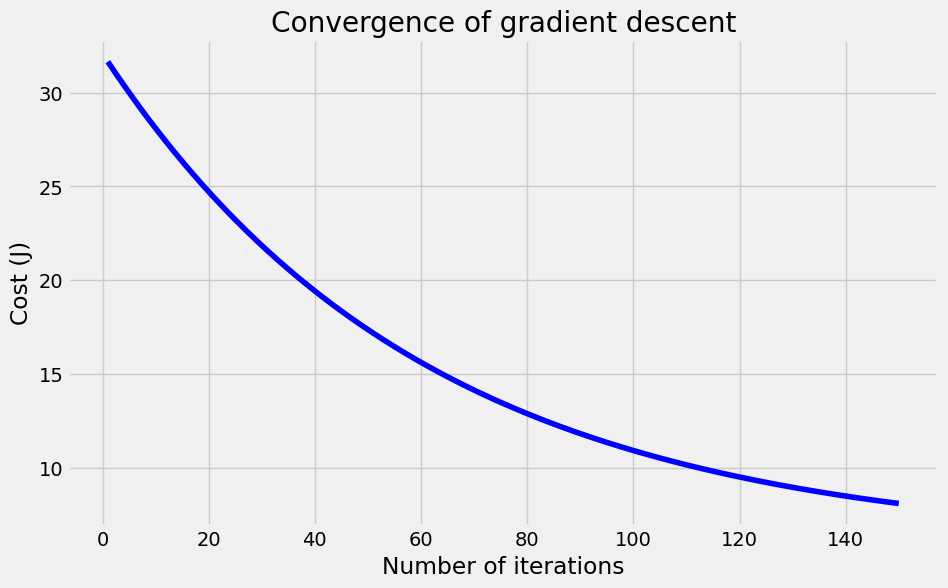

In [19]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
# plt.grid()A
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

## Next change the iterations and learning rate (alpha) and try to take loss to minimum

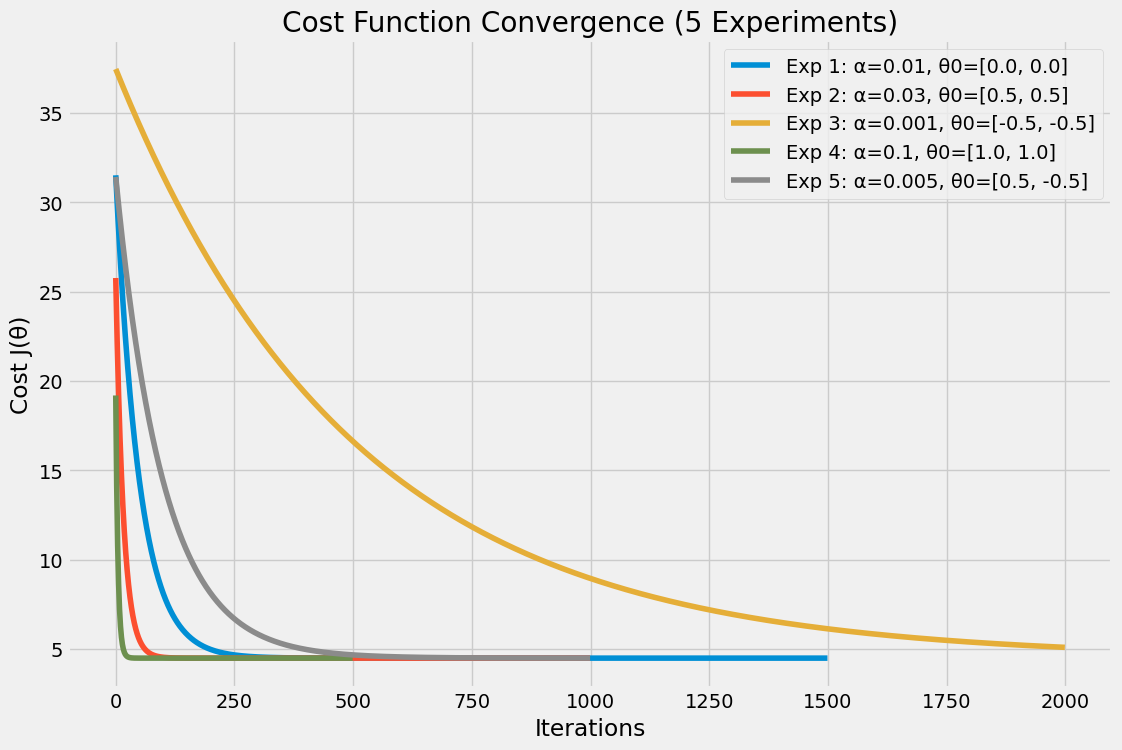

,Initial Theta,Alpha,Iterations,Final Theta,Hypothesis,Final Cost
0,"[0.0, 0.0]",0.010,1500,"[5.839133395240996, 4.593039830519434]",h(x) = 5.8391 + 4.5930 * x,4.476971
1,"[0.5, 0.5]",0.030,1000,"[5.839135051546074, 4.593041133362631]",h(x) = 5.8391 + 4.5930 * x,4.476971
2,"[-0.5, -0.5]",0.001,2000,"[4.982084465492634, 3.9044623520858113]",h(x) = 4.9821 + 3.9045 * x,5.081310
3,"[1.0, 1.0]",0.100,500,"[5.8391350515463865, 4.593041133362869]",h(x) = 5.8391 + 4.5930 * x,4.476971
4,"[0.5, -0.5]",0.005,1000,"[5.803608614675263, 4.559152197690781]",h(x) = 5.8036 + 4.5592 * x,4.478177


In [27]:
# Normalize population feature inline before building x
X_col = df.values[:, 0]  # Just the population column
X_norm = (X_col - np.mean(X_col)) / np.std(X_col)
x = np.hstack((np.ones((m, 1)), X_norm.reshape(-1, 1)))



# Run 5 experiments with different alpha, iterations, and theta
experiments = [
    {"theta_init": np.array([0.0, 0.0]), "alpha": 0.01,  "iterations": 1500},
    {"theta_init": np.array([0.5, 0.5]), "alpha": 0.03,  "iterations": 1000},
    {"theta_init": np.array([-0.5, -0.5]), "alpha": 0.001, "iterations": 2000},
    {"theta_init": np.array([1.0, 1.0]), "alpha": 0.1,   "iterations": 500},
    {"theta_init": np.array([0.5, -0.5]), "alpha": 0.005, "iterations": 1000}
]

results = []
plt.figure(figsize=(12, 8))

for i, exp in enumerate(experiments):
    theta0 = exp["theta_init"]
    alpha = exp["alpha"]
    iterations = exp["iterations"]

    final_theta, cost_history = gradient_descent(x, y, theta0.copy(), alpha, iterations)
    hypothesis = f"h(x) = {final_theta[0]:.4f} + {final_theta[1]:.4f} * x"

    results.append({
        "Initial Theta": list(theta0),
        "Alpha": alpha,
        "Iterations": iterations,
        "Final Theta": list(final_theta),
        "Hypothesis": hypothesis,
        "Final Cost": cost_history[-1]
    })

    plt.plot(range(iterations), cost_history, label=f"Exp {i+1}: α={alpha}, θ0={theta0.tolist()}")

# Plot formatting
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Cost Function Convergence (5 Experiments)")
plt.legend()
plt.grid(True)
plt.show()

# Display results table
results_df = pd.DataFrame(results)
from IPython.display import display
display(results_df)
